# Deep Q Learning Simulation in OpenAI Gym Environment

In [1]:
import gym 
import random
import math
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output

env = gym.make("LunarLander-v2")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)
print(env.observation_space)
print(env.action_space)

Box(8,)
Discrete(4)


In [2]:
class Agent():
    def __init__(self, env):
        self.is_discrete = type(env.action_space) == gym.spaces.discrete.Discrete
        self.env_discrete = type(env.observation_space) == gym.spaces.discrete.Discrete
        
        if self.is_discrete:
            self.action_size = env.action_space.n
            print("||Action-Space|| = {}".format(self.action_size))
        else:
            self.action_low = env.action_space.low
            self.action_high = env.action_space.high
            self.action_shape = env.action_space.shape
            print("||Action-Space|| range:", self.action_low, self.action_high)
            
        if self.env_discrete:
            self.state_size = env.observation_space.n
            print("||State-Space|| = {}".format(self.state_size))
        else:
            self.state_low = env.observation_space.low
            self.state_high = env.observation_space.high
            self.state_shape = env.observation_space.shape
            print("||State-Space|| range:", self.state_low, self.state_high)      
        
        self.states = env.observation_space
        self.actions = env.action_space        
    
    def get_action_random(self, state):
        if self.is_discrete:
            action = random.choice(range(self.action_size))
        else:
            action = np.random.uniform(self.action_low, self.action_high, self.action_shape)
        return action
    
    def get_action(self, state):
        action = 0 if random.random() < 0.6 else 2
        return action
    
myagent = Agent(env)

||Action-Space|| = 4
||State-Space|| range: [-inf -inf -inf -inf -inf -inf -inf -inf] [inf inf inf inf inf inf inf inf]


In [3]:
n = int(input("Enter the no. of episodes for simulation: "))

for episode in range(n):
    state = env.reset()
    for t in range(10000):
        env.render()
        print("In State: ", state)
        action = myagent.get_action(state)
        state, reward, done, info = env.step(action)
        if done:
            print("Episode {} done in {} timesteps!\n".format(episode+1, t+1))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(episode+1, t+1))
    
env.close()   

Enter the no. of episodes for simulation: 5
In State:  [ 0.001651    1.4112227   0.16721055  0.0134553  -0.00190629 -0.03787569
  0.          0.        ]
In State:  [ 0.003302    1.4109478   0.16698465 -0.01221948 -0.0037779  -0.037435
  0.          0.        ]
In State:  [ 0.00495291  1.4100732   0.1669906  -0.03887743 -0.00564839 -0.03741343
  0.          0.        ]
In State:  [ 0.00660391  1.4085987   0.16699609 -0.06554908 -0.00751864 -0.03740846
  0.          0.        ]
In State:  [ 0.008255    1.4065238   0.16700163 -0.09221777 -0.00938858 -0.03740262
  0.          0.        ]
In State:  [ 0.0099061   1.4038491   0.16700718 -0.1188863  -0.01125825 -0.03739685
  0.          0.        ]
In State:  [ 0.01155739  1.4005746   0.16701268 -0.1455548  -0.01312764 -0.03739103
  0.          0.        ]
In State:  [ 0.01320419  1.3973666   0.16662751 -0.14259273 -0.01504536 -0.03835811
  0.          0.        ]
In State:  [ 0.01496286  1.394702    0.17732951 -0.11844771 -0.01648536 -0.028

In State:  [ 0.19857836  1.0523385   0.403269   -0.31292266 -0.01741251  0.06803018
  0.          0.        ]
In State:  [ 0.20267114  1.0456586   0.40576053 -0.2968488  -0.01394407  0.06936893
  0.          0.        ]
In State:  [ 0.20676383  1.0383788   0.40576053 -0.3235165  -0.01047563  0.06936871
  0.          0.        ]
In State:  [ 0.21085663  1.0304991   0.40576053 -0.35018414 -0.0070072   0.06936865
  0.          0.        ]
In State:  [ 0.21494932  1.0220196   0.40576053 -0.37685186 -0.00353877  0.06936853
  0.          0.        ]
In State:  [ 2.1894017e-01  1.0144176e+00  3.9606351e-01 -3.3786502e-01
 -5.5752747e-04  5.9624929e-02  0.0000000e+00  0.0000000e+00]
In State:  [ 0.22296563  1.0069851   0.39936867 -0.33033684  0.00258294  0.06280945
  0.          0.        ]
In State:  [ 0.22699118  0.9989526   0.39936864 -0.35700434  0.00572341  0.06280954
  0.          0.        ]
In State:  [ 0.23101673  0.9903205   0.39936864 -0.38367185  0.00886388  0.0628095
  0.         

In State:  [ 0.4460741   0.02511765  0.25769    -0.99564546  0.1634072  -0.2943022
  0.          1.        ]
Episode 1 done in 153 timesteps!

In State:  [ 0.00657825  1.4156169   0.66629857  0.20872664 -0.00761584 -0.15092655
  0.          0.        ]
In State:  [ 0.01308927  1.4211981   0.65901256  0.24800277 -0.01543335 -0.15636386
  0.          0.        ]
In State:  [ 0.0195302   1.4276917   0.65241396  0.2884922  -0.02365811 -0.1645107
  0.          0.        ]
In State:  [ 0.02597141  1.4335859   0.6524378   0.26180992 -0.03188157 -0.16448435
  0.          0.        ]
In State:  [ 0.03241291  1.4388812   0.652462    0.23514274 -0.0401039  -0.16446199
  0.          0.        ]
In State:  [ 0.0388547   1.4435772   0.65248597  0.20846994 -0.04832491 -0.16443554
  0.          0.        ]
In State:  [ 0.04529677  1.447674    0.65251005  0.18179677 -0.05654459 -0.16440913
  0.          0.        ]
In State:  [ 0.05173903  1.4511719   0.65253395  0.15512331 -0.06476296 -0.16438267
  0.

In State:  [ 0.61778337  0.9228197   1.2330607  -0.72244304 -0.58691174 -0.13677074
  0.          0.        ]
In State:  [ 0.6302139   0.90668523  1.2492597  -0.71985686 -0.5942747  -0.14725891
  0.          0.        ]
In State:  [ 0.6430973   0.890819    1.2943035  -0.7078762  -0.601402   -0.14254585
  0.          0.        ]
In State:  [ 0.65598106  0.87435335  1.2943     -0.7345465  -0.6085293  -0.1425454
  0.          0.        ]
In State:  [ 0.66886485  0.85728824  1.2942963  -0.7612166  -0.61565655 -0.14254488
  0.          0.        ]
In State:  [ 0.681749    0.8396236   1.2942927  -0.78788674 -0.6227837  -0.14254442
  0.          0.        ]
In State:  [ 0.6950432   0.8220474   1.3350295  -0.7838608  -0.62960875 -0.13650115
  0.          0.        ]
In State:  [ 0.7083378   0.8038719   1.335026   -0.81053066 -0.6364338  -0.13650072
  0.          0.        ]
In State:  [ 0.7218531   0.78575224  1.3573892  -0.8082244  -0.64363927 -0.144111
  0.          0.        ]
In State:  [ 

In State:  [-0.48679557  1.7756779  -0.97689265 -0.1365489   0.32958472  0.09551807
  0.          0.        ]
In State:  [-0.49674258  1.7725973  -0.9988766  -0.13787366  0.3339487   0.08727883
  0.          0.        ]
In State:  [-0.50709647  1.7702302  -1.0391327  -0.10607313  0.33786264  0.07827862
  0.          0.        ]
In State:  [-0.51745045  1.7672634  -1.0391319  -0.132741    0.34177655  0.07827827
  0.          0.        ]
In State:  [-0.52780443  1.7636968  -1.0391313  -0.1594089   0.34569046  0.0782782
  0.          0.        ]
In State:  [-0.5384757   1.7608225  -1.0708296  -0.12864022  0.34957412  0.07767311
  0.          0.        ]
In State:  [-0.549147    1.7573484  -1.070829   -0.15530807  0.35345778  0.07767302
  0.          0.        ]
In State:  [-0.55981845  1.7532744  -1.0708283  -0.18197592  0.35734144  0.07767294
  0.          0.        ]
In State:  [-0.5704899   1.7486007  -1.0708277  -0.20864375  0.36122507  0.07767288
  0.          0.        ]
In State:  

In State:  [-0.2156612   0.824567   -0.64930254 -0.9252293   0.23826256  0.13615352
  0.          0.        ]
In State:  [-0.22208723  0.80317396 -0.6493012  -0.9518997   0.24507022  0.13615307
  0.          0.        ]
In State:  [-0.2287314   0.78248876 -0.6711001  -0.9204756   0.25187668  0.13612935
  0.          0.        ]
In State:  [-0.23537569  0.76120406 -0.67109865 -0.94714606  0.25868312  0.13612889
  0.          0.        ]
In State:  [-0.24194875  0.739891   -0.66471547 -0.94857806  0.2662586   0.15150958
  0.          0.        ]
In State:  [-0.24867125  0.7194826  -0.68018955 -0.9085065   0.2743869   0.16256624
  0.          0.        ]
In State:  [-0.25539398  0.698475   -0.68018734 -0.9351785   0.2825152   0.16256551
  0.          0.        ]
In State:  [-0.26211685  0.67686826 -0.68018514 -0.96185046  0.29064345  0.16256498
  0.          0.        ]
In State:  [-0.26894027  0.655172   -0.6902262  -0.9658768   0.29877678  0.16266623
  0.          0.        ]
In State: 

In State:  [ 0.01238356  0.948213    0.06937587 -0.524537   -0.03482037  0.00507066
  0.          0.        ]
In State:  [ 0.01307993  0.93581074  0.06937587 -0.55120367 -0.03456685  0.00507067
  0.          0.        ]
In State:  [ 0.0137763   0.9228085   0.06937587 -0.5778703  -0.03431332  0.00507069
  0.          0.        ]
In State:  [ 1.4435768e-02  9.1033143e-01  6.5981284e-02 -5.5453819e-01
 -3.4349192e-02 -7.1720569e-04  0.0000000e+00  0.0000000e+00]
In State:  [ 0.01500206  0.8985545   0.05723881 -0.52344316 -0.03495339 -0.01208385
  0.          0.        ]
In State:  [ 0.01556835  0.88617724  0.05723881 -0.55010986 -0.03555758 -0.01208385
  0.          0.        ]
In State:  [ 0.01599274  0.87400633  0.04380744 -0.5409649  -0.03690584 -0.02696498
  0.          0.        ]
In State:  [ 0.01647511  0.8622281   0.04943824 -0.5235119  -0.03809943 -0.02387204
  0.          0.        ]
In State:  [ 0.01707706  0.8510645   0.06098502 -0.4961778  -0.03888269 -0.01566515
  0.        

## Vanilla Q Learning

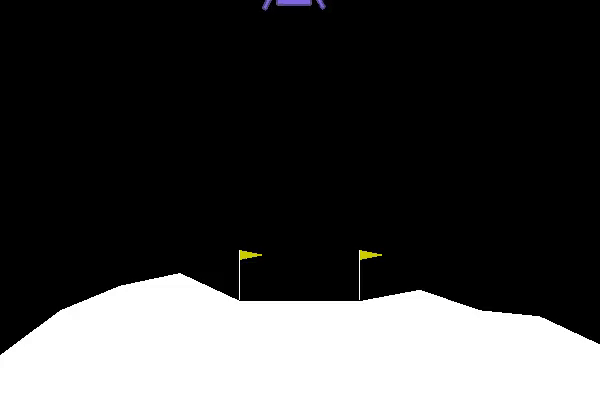

In [4]:
env = gym.make("LunarLander-v2")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)

class QLAgent(Agent):
    def __init__(self, env, size=(2, 2, 2, 2, 2, 2, 2, 2,), discount_rate=0.97, learning_rate=0.01):
        super().__init__(env)        
        
        self.eps = 1.0
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        
        self.state_size = size
        
        self.q_table = 1e-4*np.zeros(self.state_size + (self.action_size,))
        print("QTable constructed with size: {}".format(self.q_table.size))
        
    def discretize(self, state):
        upper_bounds = [-1 for i in range(len(state))]
        lower_bounds = [+1 for i in range(len(state))]
        ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
        new_obs = [int(round((self.state_size[i] - 1) * ratios[i])) for i in range(len(state))]
        new_obs = [min(self.state_size[i] - 1, max(0, new_obs[i])) for i in range(len(state))]
        return tuple(new_obs)       
        
    def get_action(self, state): #epsilon greedy policy
        state = self.discretize(state)
        q_state = self.q_table[state]
        action_greedy = np.argmax(q_state)
        action_random = super().get_action_random(state)
        return action_random if random.random() < self.eps else action_greedy  
    
    def train(self, experience):
        state, action, next_state, reward, done = experience
        state = self.discretize(state)
        next_state = self.discretize(next_state)
        
        q_next = self.q_table[next_state]
        q_next = np.zeros([self.action_size]) if done else q_next
        q_target = reward + self.discount_rate * np.max(q_next)
        #print((*state,action))
        q_update = q_target - self.q_table[(*state,action)]      #Like TD error
        self.q_table[(*state,action)] += self.learning_rate * q_update #Like TD update
        
        if done:
            self.eps = self.eps * 0.99
        
myagent = QLAgent(env)

||Action-Space|| = 4
||State-Space|| range: [-inf -inf -inf -inf -inf -inf -inf -inf] [inf inf inf inf inf inf inf inf]
QTable constructed with size: 1024


In [5]:
n = int(input("Enter the no. of episodes for simulation: "))

total_reward = 0
for ep in range(n):
    state = env.reset()
    total_reward=0
    for t in range(10000):
        env.render()        
        action = myagent.get_action(state)
        next_state, reward, done, info = env.step(action)     
        
        myagent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        #print("In State: ", state)   
        #print("In State (Discrete): ", myagent.discretize(state), "Action: ", action)       
        #print("Episode: {}, Total reward: {}, eps: {}".format(ep,total_reward,myagent.eps))
        #print(myagent.q_table)
        #time.sleep(0.05)
        #clear_output(wait=True)
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, myagent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))  
    
env.close()   

Enter the no. of episodes for simulation: 5
Episode 1 done in 115 timesteps! Total reward: -65.56785692377407, eps: 0.99

Episode 2 done in 113 timesteps! Total reward: -258.5096091519739, eps: 0.9801

Episode 3 done in 86 timesteps! Total reward: -215.43586781985226, eps: 0.9702989999999999

Episode 4 done in 71 timesteps! Total reward: -237.2039526759745, eps: 0.96059601

Episode 5 done in 91 timesteps! Total reward: -246.11854255062335, eps: 0.9509900498999999



In [6]:
env = gym.make("LunarLander-v2")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)

myagent = QLAgent(env, (4,4,4,4,4,4,4,4,))

||Action-Space|| = 4
||State-Space|| range: [-inf -inf -inf -inf -inf -inf -inf -inf] [inf inf inf inf inf inf inf inf]
QTable constructed with size: 262144


In [7]:
n = int(input("Enter the no. of episodes for simulation: "))

total_reward = 0
for ep in range(n):
    state = env.reset()
    total_reward=0
    for t in range(10000):
        env.render()        
        action = myagent.get_action(state)
        next_state, reward, done, info = env.step(action)     
        
        myagent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        #print("In State: ", state)   
        #print("In State (Discrete): ", myagent.discretize(state), "Action: ", action)       
        #print("Episode: {}, Total reward: {}, eps: {}".format(ep,total_reward,myagent.eps))
        #print(myagent.q_table)
        #time.sleep(0.05)
        #clear_output(wait=True)
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, myagent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))  
    
env.close()   

Enter the no. of episodes for simulation: 20
Episode 1 done in 88 timesteps! Total reward: -206.2152757252238, eps: 0.99

Episode 2 done in 107 timesteps! Total reward: -331.90258401720206, eps: 0.9801

Episode 3 done in 111 timesteps! Total reward: -328.49530738716794, eps: 0.9702989999999999

Episode 4 done in 69 timesteps! Total reward: -76.20605182739244, eps: 0.96059601

Episode 5 done in 95 timesteps! Total reward: -240.88624740490724, eps: 0.9509900498999999

Episode 6 done in 128 timesteps! Total reward: -150.81137467313093, eps: 0.9414801494009999

Episode 7 done in 60 timesteps! Total reward: -58.513929990514214, eps: 0.9320653479069899

Episode 8 done in 145 timesteps! Total reward: -72.39931792047989, eps: 0.92274469442792

Episode 9 done in 76 timesteps! Total reward: -244.7626344194912, eps: 0.9135172474836407

Episode 10 done in 85 timesteps! Total reward: -54.252003312831924, eps: 0.9043820750088043

Episode 11 done in 164 timesteps! Total reward: -92.38527061880603, ep

# DQN

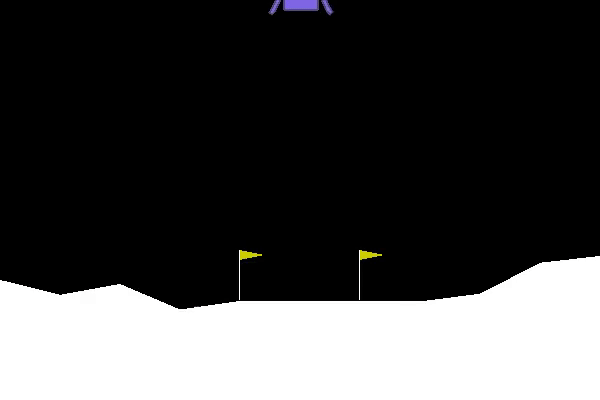

In [3]:
import gym
import random
import numpy as np
import tensorflow.keras as keras
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from collections import deque
print("Gym:", gym.__version__)
print("Tensorflow:", tf.__version__)
print("tf.keras:", keras.__version__)

W1122 05:27:26.513058 140293879453504 deprecation.py:323] From /home/aletheia/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/compat/v2_compat.py:65: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


Gym: 0.15.3
Tensorflow: 2.0.0-rc0
tf.keras: 2.2.4-tf


In [4]:
class ReplayCache():
    def __init__(self, maxlen):
        self.cache = deque(maxlen=maxlen)
        
    def add(self, experience):
        self.cache.append(experience)
        
    def sample(self, batch_size):
        sample_size = min(len(self.cache), batch_size)
        samples = random.choices(self.cache, k=sample_size)
        return map(list, zip(*samples))


In [6]:
class DQNAgent(Agent):
    def __init__(self, env, discount_rate=0.97, learning_rate=0.01):
        super().__init__(env)      
        self.replay_xp = ReplayCache(maxlen=100000)        
        self.eps = 1.0
        self.gamma = discount_rate
        self.learning_rate = learning_rate
        
        #Neural Network
        self.inputs = keras.layers.Input(shape=self.state_shape)
        self.one_hot_action = keras.layers.Input(shape=(self.action_size,))
        self.hidden1 = keras.layers.Dense(160, activation='relu')(self.inputs)
        self.hidden1x = keras.layers.Dense(120, activation='relu')(self.hidden1)
        self.hidden2 = keras.layers.Dense(self.action_size, activation=None, name="q_state")(self.hidden1x)
        self.q_state_action = keras.layers.Dot(axes=1)([self.hidden2, self.one_hot_action])
        
        #Q value function approximator
        self.qnn = keras.models.Model(inputs=[self.inputs, self.one_hot_action], outputs=self.q_state_action)
        self.qnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])        
        self.q_state = keras.models.Model(inputs=self.qnn.input[0], outputs=self.qnn.get_layer("q_state").output)
        
        #keras.utils.plot_model(self.qnn)
        
    def get_action(self, state):
        state=state.reshape((1,self.state_shape[0]))
        #state->action values
        q_state = self.q_state.predict(state)
        action_greedy = np.argmax(q_state)
        action_random = super().get_action_random(state)
        return action_random if random.random() < self.eps else action_greedy        
    
    def train(self, state, action, next_state, reward, done, batch_size=64):
        action = keras.utils.to_categorical(action, num_classes=self.action_size)        
        self.replay_xp.add((state, action, next_state, reward, done))
        states, actions, next_states, rewards, dones = self.replay_xp.sample(64)
        next_states=np.array(next_states).reshape((len(next_states), *self.state_shape))
        states=np.array(states).reshape((len(states), *self.state_shape))
        actions=np.array(actions).reshape((len(actions), self.action_size))        
        
        q_next_states = self.q_state.predict(next_states,verbose=0)        
        q_next_states[dones] = np.zeros(self.action_size)
        q_targets = rewards + self.gamma * np.max(q_next_states, axis=1) 
        
        self.qnn.fit([states, actions], [q_targets],verbose=0)
        
        if done: self.eps = max(0.1, 0.99*self.eps)

In [14]:
env = gym.make("LunarLander-v2")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)

deep_agent = DQNAgent(env)
num_episodes = 200
rewards = []
for ep in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = deep_agent.get_action(state)        
        next_state, reward, done, info = env.step(action)
        deep_agent.train(state, action, next_state, reward, done)
        env.render()
        total_reward += reward
        state = next_state
    rewards.append(total_reward)    
    print("\nEpisode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, deep_agent.eps))

||Action-Space|| = 4
||State-Space|| range: [-inf -inf -inf -inf -inf -inf -inf -inf] [inf inf inf inf inf inf inf inf]
Train on 1 samples
1/1 [==============================] - 0s 128ms/sample - loss: 21.1122 - acc: 0.0000e+00
Train on 2 samples
2/2 [==============================] - 0s 1ms/sample - loss: 21.1080 - acc: 0.0000e+00
Train on 3 samples
3/3 [==============================] - 0s 733us/sample - loss: 7.3104 - acc: 0.0000e+00
Train on 4 samples
4/4 [==============================] - 0s 670us/sample - loss: 6.6040 - acc: 0.0000e+00
Train on 5 samples
5/5 [==============================] - 0s 712us/sample - loss: 8.5104 - acc: 0.0000e+00
Train on 6 samples
6/6 [==============================] - 0s 336us/sample - loss: 2.3953 - acc: 0.0000e+00
Train on 7 samples
7/7 [==============================] - 0s 591us/sample - loss: 3.7457 - acc: 0.0000e+00
Train on 8 samples
8/8 [==============================] - 0s 410us/sample - loss: 6.1001 - acc: 0.0000e+00
Train on 9 samples
9/9 [

50/50 [==============================] - 0s 176us/sample - loss: 3.7043 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 3.4640 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 2.6306 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 384.9815 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 253us/sample - loss: 4.0605 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 9.0679 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 280us/sample - loss: 9.5373 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 2.3208 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 204.5871 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 219us/sample - loss: 189.5931 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 3.5803 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 2.6001 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 3.5897 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 6.5208 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 9.9459 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 297us/sample - loss: 3.6322 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 190.7255 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 188.4725 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 227us/sample - loss: 72.1534 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 131.8183 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 295us/sample - loss: 2.8084 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 4.8654 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 354us/sample - loss: 4.1484 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 132.2937 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 4.1565 - acc: 0.0000e+00
Episode 4 done in 116 timesteps! Total reward: -492.047641402363, eps: 0.96059601

Train on 50 samples
50/50 [==============================] - 0s 126us/sample - loss: 174.9341 - acc: 0.0000e+00
Train on 50 samples
50/50 [=======================

50/50 [==============================] - 0s 119us/sample - loss: 7.7107 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 43.1679 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 458us/sample - loss: 8.2533 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 172.1160 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 13.4611 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 26.2195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 22.2018 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 13.7176 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 15.8299 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 218us/sample - loss: 13.2063 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 170.7312 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 6.9945 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 222.7060 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 4.6958 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 141us/sample - loss: 5.0084 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 7.3781 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 268us/sample - loss: 16.0054 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 14.8582 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 285us/sample - loss: 3.3778 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 248.8286 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 4.9958 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 4.5681 - acc: 0.0000e+00
Episode 8 done in 116 timesteps! Total reward: -234.01068701673196, eps: 0.92274469442792

Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 54.1672 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 4.4379 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 398.7860 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 275us/sample - loss: 5.2215 - acc: 0.0000e+00
Train on 50 samples
50/50 [=================

50/50 [==============================] - 0s 253us/sample - loss: 5.8532 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 39.9710 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 5.4032 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 179.7192 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 29.9697 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 3.9863 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 109.0567 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 5.6885 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 32.2425 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 166us/sample - loss: 9.6407 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - ETA: 0s - loss: 3.7591 - acc: 0.0000e+0 - 0s 208us/sample - loss: 2.7591 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 4.9628 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 23.8654 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 8.9887 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 123.6522 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 1.7519 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 140us/sample - loss: 190.5896 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 7.7381 -

50/50 [==============================] - 0s 206us/sample - loss: 276.6083 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 4.3979 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 15.4495 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 4.4832 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 5.3487 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 93.5092 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 117.4456 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 100.3988 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 112.4056 - acc: 0.0000e+00
Train on 50 samples


Train on 50 samples
50/50 [==============================] - 0s 262us/sample - loss: 13.2466 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 330us/sample - loss: 98.7935 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 184.5312 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 125.3475 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 3.5999 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 138.0112 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 274us/sample - loss: 6.5251 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 245us/sample - loss: 194.9451 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 2.9573 - acc: 0.0000e+00


50/50 [==============================] - 0s 163us/sample - loss: 8.0301 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 402us/sample - loss: 8.4980 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 438.8066 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 137.0676 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 44.3118 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 8.1421 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 53.3791 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 4.5160 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 128us/sample - loss: 21.8897 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 238us/sample - loss: 60.4997 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 17.8346 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 19.6016 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 16.6458 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 13.7786 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 2.5594 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 10.0198 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 6.8142 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 75.8506 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 238us/sample - loss: 53.7581 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 10.4085 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 8.7814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 21.7390 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 127us/sample - loss: 14.1474 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 2.4995 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 349.0572 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 318.8831 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 4.0437 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 191us/sample - loss: 396.2130 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 4.2848 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 97.3071 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 30.6832 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 222.1923 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 11.9981 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 153.7838 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 3.3893 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 397us/sample - loss: 52.2458 - acc: 0.0000e+00
Train on 50 samples


50/50 [==============================] - 0s 258us/sample - loss: 93.1040 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 68.7026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 277us/sample - loss: 33.6487 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 5.7401 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 141.9647 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 8.7032 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 75.5276 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 9.8584 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 310.0349 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 185us/sample - loss: 101.8685 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 294us/sample - loss: 76.4099 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 90.0207 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 17.2357 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 18.6991 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 278us/sample - loss: 326.9426 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 120.8325 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 3.6025 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 10.0051 - acc: 0.0000e+00
Train on 50 samples

Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 13.7436 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 12.3706 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 356.6279 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 6.0807 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 74.7456 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 35.0660 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 29.0531 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 5.0333 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 17.9815 - acc: 0.0000e+00
Tr

50/50 [==============================] - 0s 139us/sample - loss: 94.8775 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 109.6197 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 111.4058 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 17.4087 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 3.3843 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 56.7837 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 122us/sample - loss: 234.0975 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 134us/sample - loss: 159.9602 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 28.7176 - acc: 0.0000e+00
Train on 50 sample

50/50 [==============================] - 0s 187us/sample - loss: 7.2649 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 23.5880 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 16.0037 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 7.1026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 6.7305 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 10.8195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 154us/sample - loss: 204.7569 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 19.7933 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 5.0490 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 313us/sample - loss: 66.3742 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 469.2769 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 24.3130 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 319.0653 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 20.2996 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 158.3657 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 6.2060 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 3.8698 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 135us/sample - loss: 128.3991 - acc: 0.0000e+00
Train on 50 samples

50/50 [==============================] - 0s 188us/sample - loss: 9.5754 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 126us/sample - loss: 14.9591 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 4.1562 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 215.1979 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 16.2759 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 134.7780 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 241.6089 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 46.4998 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 2.8808 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 194us/sample - loss: 42.5115 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 50.3788 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 124us/sample - loss: 19.4540 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 118.1309 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 32.1207 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 3.8381 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 27.1890 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 311.4876 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 19.0762 - acc: 0.0000e+00
Train on 50 samples


50/50 [==============================] - 0s 168us/sample - loss: 3.0681 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 256.9034 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 36.6477 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 4.7368 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 35.8315 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 195.4159 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 48.5305 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 91.8690 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 151.8106 - acc: 0.0000e+00
Train on 50 samples


Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 10.3471 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 15.2540 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 212.0780 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 89.9429 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 4.9344 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 168.7477 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 251us/sample - loss: 118.8740 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 121.3428 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 4.8524 - acc: 0.0000e+00

50/50 [==============================] - 0s 201us/sample - loss: 72.9991 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 5.6680 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 2.7044 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 7.8229 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 5.1158 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 32.7960 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 5.2671 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 91.8432 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 48.3576 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 130us/sample - loss: 230.0191 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 26.4799 - acc: 0.0000e+00
Episode 28 done in 116 timesteps! Total reward: -68.4791272902953, eps: 0.7547192872036325

Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 111.0473 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 5.2836 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 358us/sample - loss: 117.8794 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 5.0810 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 128us/sample - loss: 6.1759 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 18.2376 - acc: 0.0000e+00
Train on 50 samples
50/50 [=============

50/50 [==============================] - 0s 173us/sample - loss: 8.1186 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 12.0691 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 76.2216 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 90.3814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 216.9812 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 154us/sample - loss: 189.2089 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 36.3639 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 57.4039 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 109.8774 - acc: 0.0000e+00
Train on 50 samples

50/50 [==============================] - 0s 180us/sample - loss: 21.1244 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 106.1227 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 6.1087 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 135us/sample - loss: 3.5817 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 161.7551 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 54.0088 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 25.0454 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 265us/sample - loss: 20.6369 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 26.3191 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 228us/sample - loss: 3.9655 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 51.5131 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 3.7222 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 22.8837 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 10.6149 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 156.7272 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 104.2425 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 140us/sample - loss: 16.6373 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 4.4705 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 186us/sample - loss: 174.3663 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 16.9792 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 13.7814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 21.1299 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 208.3730 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 62.1458 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 93.1689 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 49.1658 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 5.9496 - acc: 0.0000e+00
Train on 50 samples


50/50 [==============================] - 0s 245us/sample - loss: 3.5202 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 12.7435 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 3.6376 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 4.1529 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 11.7725 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 10.7118 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 296us/sample - loss: 462.5617 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 29.0234 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 189.3372 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 212us/sample - loss: 9.3675 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 3.3760 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 12.3185 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 117us/sample - loss: 120.3469 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 97.0460 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 4.9442 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 16.4242 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 280.4208 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 23.7855 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 264us/sample - loss: 192.2820 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 117.8476 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 18.1660 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 30.8804 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 139us/sample - loss: 7.8539 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 82.2760 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 10.9623 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 39.3723 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 74.7235 - acc: 0.0000e+00
Train on 50 samples


50/50 [==============================] - 0s 213us/sample - loss: 14.0327 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 11.7369 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 10.0341 - acc: 0.0000e+00
Episode 36 done in 116 timesteps! Total reward: -80.84272785749754, eps: 0.6964132180495735

Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 45.7892 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 37.0166 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 139us/sample - loss: 4.9149 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 297us/sample - loss: 172.5588 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 5.3547 - acc: 0.0000e+00
Train on 50 samples
50/50 [=============

50/50 [==============================] - 0s 320us/sample - loss: 23.4920 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 66.4758 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 3.7518 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 29.3705 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 4.4128 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 10.9360 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 117.0000 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 99.9426 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 249us/sample - loss: 7.1844 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 169us/sample - loss: 23.2336 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 60.3004 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 579.1626 - acc: 0.0000e+00
Episode 39 done in 116 timesteps! Total reward: -14.026982474562942, eps: 0.6757290490602831

Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 34.3025 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 127us/sample - loss: 412.0260 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 51.7720 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 38.9334 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 7.9272 - acc: 0.0000e+00
Train on 50 samples
50/50 [==========

50/50 [==============================] - 0s 140us/sample - loss: 8.1633 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 129.6605 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 10.3328 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 14.0987 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 3.2653 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 25.9032 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 8.6925 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 62.9122 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 65.0244 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 159us/sample - loss: 27.6399 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 24.4261 - acc: 0.0000e+00
Episode 41 done in 116 timesteps! Total reward: -340.22939345455904, eps: 0.6622820409839835

Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 37.7101 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 191.0736 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 311us/sample - loss: 40.8900 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 170.7852 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 10.2490 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 17.8921 - acc: 0.0000e+00
Train on 50 samples
50/50 [=========

50/50 [==============================] - 0s 164us/sample - loss: 4.9441 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 6.9696 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 10.4131 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 3.3427 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 5.2051 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 25.2518 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 253us/sample - loss: 357.0584 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 8.7703 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 114.3687 - acc: 0.0000e+00
Train on 50 samples
50/5

Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 5.7999 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - ETA: 0s - loss: 12.7905 - acc: 0.0000e+ - 0s 230us/sample - loss: 22.4558 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 17.7539 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 9.5215 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 58.5889 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 9.5186 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 331us/sample - loss: 6.1322 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 12.7783 - acc: 0.0000e+00
Episode 44 done in 116 timesteps! Total reward: -51.49536174788139, eps: 0

50/50 [==============================] - 0s 353us/sample - loss: 91.0193 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 360us/sample - loss: 265.1974 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 284us/sample - loss: 6.8963 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 249us/sample - loss: 9.3611 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 180.6121 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 16.4137 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 34.7806 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 18.1909 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 10.3058 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 274us/sample - loss: 50.7826 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 6.6071 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 5.4312 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 6.5230 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 69.7764 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 473us/sample - loss: 62.9338 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 13.0659 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 60.6838 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 313.5183 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 207us/sample - loss: 64.6574 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 8.9028 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 110.1543 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 33.9593 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 3.6187 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 169.6735 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 21.0737 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 90.6836 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 22.8082 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 152us/sample - loss: 103.6590 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 28.3784 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 115.9446 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 53.5566 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 173.2795 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 14.9389 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 88.2642 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 303.3915 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 76.8423 - acc: 0.0000e+00
Train on 50 sampl

50/50 [==============================] - 0s 211us/sample - loss: 15.7045 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 5.3177 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 136.3241 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 268us/sample - loss: 55.4092 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 5.4160 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 363.8315 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 24.5305 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 102.9518 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 4.6419 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 191us/sample - loss: 6.8523 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 148.3549 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 143.1963 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 12.8746 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 17.3272 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 39.0494 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 36.2092 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 18.8700 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 3.9662 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 143us/sample - loss: 13.4783 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 292us/sample - loss: 115.6828 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 23.2158 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 5.1601 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 6.2599 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 33.8667 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 744.4525 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 279us/sample - loss: 6.7488 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 132.7626 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 191us/sample - loss: 49.4119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 82.1316 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 17.7829 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 4.5496 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 307us/sample - loss: 8.7395 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 7.6531 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 288us/sample - loss: 86.0714 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 249us/sample - loss: 16.2774 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 158.5531 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 166us/sample - loss: 10.5254 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 13.8872 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 388us/sample - loss: 89.9523 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 23.1793 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 124us/sample - loss: 38.0981 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 7.3728 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 6.8112 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 4.6564 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 265us/sample - loss: 56.1845 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 251us/sample - loss: 19.2366 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 124us/sample - loss: 3.6906 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 37.6538 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 2.9193 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 13.4800 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 5.7168 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 269us/sample - loss: 112.5685 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 12.4486 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 26.7200 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 151us/sample - loss: 72.3895 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 300us/sample - loss: 5.1955 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 6.3583 - acc: 0.0000e+00
Episode 55 done in 116 timesteps! Total reward: -58.40534322816627, eps: 0.5753547499769285

Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 158.5560 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 268us/sample - loss: 86.7945 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 8.6903 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 108.7003 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 17.2381 - acc: 0.0000e+00
Train on 50 samples
50/50 [=============

50/50 [==============================] - 0s 161us/sample - loss: 6.5436 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 40.0381 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 141.5074 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 4.6354 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 4.3209 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 23.4924 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 3.0789 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 25.5748 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 61.7905 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 160us/sample - loss: 12.8903 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 42.5696 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 122.7414 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 6.9896 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 12.3756 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 4.2600 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 69.2792 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 139.4168 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 137us/sample - loss: 85.8689 - acc: 0.0000e+00
Episode 58 done in 11

50/50 [==============================] - 0s 214us/sample - loss: 26.6173 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 7.3486 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 9.1946 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 3.9313 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 66.7526 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 7.8068 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 7.9748 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 206.6782 - acc: 0.0000e+00
Episode 59 done in 116 timesteps! Total reward: -159.67264575868194, eps: 0.5526834771623851

Train on 50 samples
50/50 [===============

50/50 [==============================] - 0s 178us/sample - loss: 3.6473 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 78.1736 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 101.4979 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 12.5284 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 27.3455 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 25.9309 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 273us/sample - loss: 17.8483 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 90.0833 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 29.8369 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 292us/sample - loss: 11.4812 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 24.2863 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 90.5487 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 277us/sample - loss: 6.6813 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 9.2141 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 1029.0746 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 5.3478 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 40.0521 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 12.1611 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 241us/sample - loss: 242.6713 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 297us/sample - loss: 15.4722 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 17.1060 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 264us/sample - loss: 292.9240 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 3.5347 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 56.2805 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 22.7360 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 245us/sample - loss: 6.1513 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 24.4338 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 165us/sample - loss: 81.7522 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 6.7223 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 19.6959 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 19.0531 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 166.9703 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 7.5694 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 13.1247 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 269us/sample - loss: 20.9244 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 7.9390 - acc: 0.0000e+00
Train on 50 samples
50/

Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 121.3572 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 78.4932 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 10.6112 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 124us/sample - loss: 6.6269 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 238.8043 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 97.1704 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 2.0426 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 4.6374 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 3.6725 - acc: 0.0000e+00
Tra

50/50 [==============================] - 0s 156us/sample - loss: 8.7208 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 12.6084 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 17.8336 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 68.4810 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 84.3059 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 5.5813 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 19.2139 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 118.7921 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 122.3124 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 194us/sample - loss: 5.0677 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 7.1150 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 101.3780 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 127us/sample - loss: 4.2426 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 243us/sample - loss: 13.8969 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 3.0239 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 25.2649 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 13.7071 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 252.9657 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 219us/sample - loss: 32.6730 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 10.6099 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 39.3319 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 3.7788 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 27.6289 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 17.0188 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 11.0105 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 291.9472 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 7.8000 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 216us/sample - loss: 5.8459 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 5.0590 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 19.4454 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 3.1455 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 7.3343 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 4.0801 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 120.5404 - acc: 0.0000e+00
Episode 67 done in 116 timesteps! Total reward: -294.656920363513, eps: 0.5099857462495653

Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 31.3920 - acc: 0.0000e+00
Train on 50 samples
50/50 [=================

50/50 [==============================] - 0s 186us/sample - loss: 72.6805 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 25.7316 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 278us/sample - loss: 34.2032 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 322us/sample - loss: 59.2511 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 137us/sample - loss: 17.1316 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 7.1507 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 3.6606 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 13.1212 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 4.5413 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 164us/sample - loss: 19.0152 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 25.2040 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 63.2664 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 931.8243 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 7.7926 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 6.8301 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 10.7622 - acc: 0.0000e+00
Episode 70 done in 116 timesteps! Total reward: -216.23324984055614, eps: 0.49483865960020695

Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 146.8914 - acc: 0.0000e+00
Train on 50 samples
50/50 [==========

50/50 [==============================] - 0s 170us/sample - loss: 8.5166 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 5.3161 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 3.8300 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 8.9033 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 100.6941 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 4.1185 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 20.8082 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 22.1948 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 123us/sample - loss: 17.3996 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 244us/sample - loss: 14.8265 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 8.3662 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 8.5287 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 4.8997 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 6.1646 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 47.7205 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 27.7175 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 6.2545 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 3.5011 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 170us/sample - loss: 22.8792 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 5.6188 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 5.5246 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 154us/sample - loss: 21.8717 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 85.9579 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 133.4824 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 243us/sample - loss: 66.9852 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 253us/sample - loss: 17.4684 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 76.1237 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 263us/sample - loss: 52.0498 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 15.7572 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 133us/sample - loss: 7.9087 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 10.3290 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 29.1214 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 27.7266 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 6.1534 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 15.4970 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 262us/sample - loss: 7.1701 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 182us/sample - loss: 6.4980 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 11.8370 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 174.7422 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 290us/sample - loss: 4.2022 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 12.6869 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 52.3003 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 7.7941 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 5.8563 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 407us/sample - loss: 1064.8719 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 163us/sample - loss: 39.2168 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 6.0628 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 127.9978 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 20.2016 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 106.6823 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 64.6003 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 48.3880 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 45.0398 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 135.7021 - acc: 0.0000e+00
Train on 50 samples

50/50 [==============================] - 0s 176us/sample - loss: 217.4585 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 13.6267 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 336us/sample - loss: 156.3744 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 307us/sample - loss: 229.1189 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 12.2405 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 280us/sample - loss: 37.9830 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 4.1092 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 284us/sample - loss: 86.9878 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 166.4772 - acc: 0.0000e+00
Train on 50 sample

50/50 [==============================] - 0s 206us/sample - loss: 13.0020 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 10.1629 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 5.5038 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 71.6082 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 9.8751 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 317.8609 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 7.0643 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 18.4348 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 11.4161 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 162us/sample - loss: 31.8677 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 38.7571 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 31.8051 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 197.1189 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 4.9725 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 369.0758 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 2.7141 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 2.8162 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 31.9662 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 184us/sample - loss: 364.1234 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 37.4613 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 51.5230 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 275us/sample - loss: 9.8690 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 15.3556 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 4.6010 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 306us/sample - loss: 51.2130 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 46.2448 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 75.6596 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 143us/sample - loss: 25.2307 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 32.2447 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 14.5271 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 243.1597 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 126us/sample - loss: 4.3476 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 65.9124 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 23.7041 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 4.3484 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 4.9566 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 197us/sample - loss: 24.1337 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 4.6463 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 107.5372 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 90.7063 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 4.8579 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 34.4151 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 12.3435 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 4.2824 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 8.0358 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 169us/sample - loss: 7.0075 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 249us/sample - loss: 92.1703 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 4.7687 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 5.2719 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 14.8906 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 255us/sample - loss: 46.3786 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 142.7816 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 19.6945 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 242us/sample - loss: 61.4374 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 162us/sample - loss: 34.5410 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 80.0119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 35.1362 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 344.3276 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 3.2127 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 9.8507 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 7.4613 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 13.7211 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 37.2928 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 184us/sample - loss: 20.0890 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 236.9969 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 139us/sample - loss: 81.1954 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 57.3772 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 29.9997 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 3.3431 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 10.8645 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 4.3488 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 4.0738 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 187us/sample - loss: 16.6964 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 3.4268 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 10.7679 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 12.7918 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 17.0086 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 80.2815 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 38.8402 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 5.0374 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 364us/sample - loss: 11.9923 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 170us/sample - loss: 8.9924 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 8.7130 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 9.2331 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 45.7842 - acc: 0.0000e+00
Episode 85 done in 116 timesteps! Total reward: -14.36206479646225, eps: 0.42559012338865465

Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 31.5744 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 14.6868 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 19.4204 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 24.8014 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============

50/50 [==============================] - 0s 208us/sample - loss: 64.1484 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 7.3485 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 4.3061 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 64.8005 - acc: 0.0000e+00
Episode 86 done in 116 timesteps! Total reward: -28.531056803947948, eps: 0.4213342221547681

Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 4.7250 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 352.7624 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 17.5814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 15.0039 - acc: 0.0000e+00
Train on 50 samples
50/50 [=============

Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 100.5257 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 51.0045 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 37.1734 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 35.3040 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 15.3997 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 14.5043 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 106.4075 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 3.2676 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 310us/sample - loss: 8.0215 - acc: 0.0000e+00
T

50/50 [==============================] - 0s 208us/sample - loss: 7.7042 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 5.3857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 306us/sample - loss: 22.7435 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 121us/sample - loss: 11.0150 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 901.9445 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 3.9086 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 4.1802 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 4.7058 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 59.7193 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 226us/sample - loss: 16.7477 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 4.7796 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 2.0562 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 7.2005 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 17.8773 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 28.2487 - acc: 0.0000e+00
Episode 89 done in 116 timesteps! Total reward: -213.0785289782313, eps: 0.40882017442254937

Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 47.8461 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 3.6662 - acc: 0.0000e+00
Train on 50 samples
50/50 [===============

50/50 [==============================] - 0s 143us/sample - loss: 6.2864 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 16.9687 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 13.0945 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 3.4049 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 3.9515 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 31.1802 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 255us/sample - loss: 3.6081 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 8.8011 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 35.4159 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 179us/sample - loss: 18.4689 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 38.6186 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 19.3446 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 62.7364 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 127us/sample - loss: 4.9948 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 7.1419 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 12.9272 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 21.8105 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 4.7335 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 144us/sample - loss: 7.1652 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 11.4014 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 180.5570 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 6.0568 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 114.2854 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 84.1905 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 19.8040 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 5.1250 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 195.4352 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 190us/sample - loss: 6.1418 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 34.7260 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 119us/sample - loss: 6.6234 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 22.0558 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 71.6503 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 7.3980 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 141us/sample - loss: 5.0586 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 19.2551 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 16.9155 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 217us/sample - loss: 30.1961 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 2.7153 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 181.2481 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 183.5357 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 55.4689 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 19.0562 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 7.7248 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 70.6994 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 8.6450 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 197us/sample - loss: 12.2370 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 6.4877 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 91.1105 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 9.2244 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 242us/sample - loss: 21.1558 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 192.4639 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 150.8499 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 4.3232 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 3.2258 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 206us/sample - loss: 17.7873 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 275us/sample - loss: 155.6728 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 29.6230 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 5.2410 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 25.7517 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 141us/sample - loss: 3.5709 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 98.6026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 2.8538 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 2.5179 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 229us/sample - loss: 19.5581 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 27.3195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 57.7289 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 167.7018 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 6.4349 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 44.4578 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 32.5936 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 251us/sample - loss: 10.4600 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 369.7670 - acc: 0.0000e+00
Train on 50 samples


50/50 [==============================] - 0s 175us/sample - loss: 37.3414 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 13.5538 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 2.9985 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 5.7733 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 21.8646 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 5.3834 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 52.9928 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 5.7777 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 10.3623 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 235us/sample - loss: 7.7148 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 128.9509 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 10.3958 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 2.6703 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 6.8584 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 283us/sample - loss: 9.6434 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 27.8097 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 68.9125 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 25.8713 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 183us/sample - loss: 7.7164 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 128us/sample - loss: 72.0273 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 15.9660 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 304us/sample - loss: 60.8397 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 10.6747 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 16.2778 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 19.7329 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 53.8620 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 7.9157 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 249us/sample - loss: 5.7889 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 3.1101 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 356us/sample - loss: 10.9612 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 11.3924 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 18.9378 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 27.1501 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 136.4022 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 289us/sample - loss: 71.7149 - acc: 0.0000e+00
Episode 92 done in 116 timesteps! Total reward: -47.9243904370703, eps: 0.39667780642202527

Train on 50 samples
50/50 [=============

50/50 [==============================] - 0s 196us/sample - loss: 2.7181 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 241.8143 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 6.7691 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 108.7541 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 6.7132 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 16.1991 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 13.1897 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 10.8161 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 18.6322 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 278us/sample - loss: 8.2741 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 10.8668 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 4.5773 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 20.8839 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 39.5367 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 374us/sample - loss: 12.5296 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 37.8758 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 15.4782 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 5.8717 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 147us/sample - loss: 14.9975 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 309us/sample - loss: 8.3952 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 249us/sample - loss: 9.7366 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 13.5263 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 104.0358 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 267us/sample - loss: 6.8526 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 378us/sample - loss: 43.7030 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 430us/sample - loss: 19.6973 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 22.7554 - acc: 0.0000e+00
Train on 50 samples
50/

Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 6.6095 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 20.3774 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 18.1736 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 102.1159 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 9.3993 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 7.2857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 28.2453 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 114.8814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 2.9078 - acc: 0.0000e+00
Tra

50/50 [==============================] - 0s 281us/sample - loss: 6.2966 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 298us/sample - loss: 13.6390 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 137us/sample - loss: 109.9991 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 9.3641 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 286us/sample - loss: 240.3130 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 32.0332 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 353us/sample - loss: 21.4489 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 36.5120 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 103.3334 - acc: 0.0000e+00
Train on 50 samples


50/50 [==============================] - 0s 149us/sample - loss: 75.2173 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 36.4514 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 301us/sample - loss: 47.8004 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 10.9747 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 2.9704 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 106.6424 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 56.7007 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 14.9282 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 95.4962 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 165us/sample - loss: 31.9029 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 8.6236 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 6.6228 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 133us/sample - loss: 22.9920 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 5.4126 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 302us/sample - loss: 34.0305 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 199.2505 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 4.2344 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 26.9648 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 175us/sample - loss: 12.2715 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 2.0152 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 243us/sample - loss: 24.4089 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 7.0707 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 276us/sample - loss: 8.8859 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 10.9983 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 3.1791 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 59.7910 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 51.0311 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 214us/sample - loss: 16.5315 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 16.8852 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 151.8827 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 60.9137 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 14.1730 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 19.6268 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 15.8385 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 7.4378 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 7.8949 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 193us/sample - loss: 5.2572 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 54.3691 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 9.1314 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 128.1716 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 11.1237 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 13.3107 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 132.7730 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 11.4179 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 5.0758 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 178us/sample - loss: 12.9687 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 7.8909 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 166.8490 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 16.2557 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 4.4167 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 10.0399 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 7.7026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 1.7200 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 285us/sample - loss: 120.8310 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 169us/sample - loss: 96.1483 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 95.8267 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 6.7891 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 63.3991 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 5.5775 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 272us/sample - loss: 14.7455 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 15.6977 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 271us/sample - loss: 8.7381 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 14.1570 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 264us/sample - loss: 3.3327 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 5.1212 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 5.4905 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 32.4493 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 13.4244 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 9.7913 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 177.5986 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 3.6173 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 15.3234 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 196us/sample - loss: 6.3337 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 2.7802 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 5.0209 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 54.0985 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 2.6999 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 245us/sample - loss: 19.4523 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 5.6882 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 6.2168 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 134.6836 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 281us/sample - loss: 96.6739 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 37.4879 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 15.0797 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 26.5987 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 4.7069 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 50.7457 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 125.6845 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 13.9148 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 102.5183 - acc: 0.0000e+00
Train on 50 samples


50/50 [==============================] - 0s 223us/sample - loss: 124.2063 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 5.7845 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 4.6641 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 60.4647 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 84.9363 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 10.6218 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 96.7528 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 284us/sample - loss: 5.5760 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 23.4753 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 257us/sample - loss: 6.6092 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 36.1655 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 3.6694 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 10.9092 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 14.9966 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 39.7596 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 23.7917 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 259us/sample - loss: 16.8341 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 272us/sample - loss: 12.5813 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 211us/sample - loss: 3.4846 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 21.4022 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 45.4450 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 13.9649 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 249us/sample - loss: 3.8418 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 9.3652 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 2.9182 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 8.4576 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 10.4160 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 177us/sample - loss: 9.2270 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 48.1088 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 27.0148 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 41.3276 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 18.3096 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 4.7967 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 8.6036 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 296us/sample - loss: 21.3822 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 6.5162 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 157us/sample - loss: 4.9020 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 7.0096 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 20.4814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 7.7119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 151.1421 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 4.9195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 128.8221 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 47.4619 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 9.2473 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 207us/sample - loss: 20.7990 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 8.6090 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 717.2262 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 347us/sample - loss: 5.3771 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 107.9962 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 6.8524 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 13.0669 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 5.9771 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 6.2585 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 187us/sample - loss: 17.3287 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 6.1538 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 5.3192 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 7.1459 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 16.8736 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 137us/sample - loss: 6.5539 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 13.7343 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 261us/sample - loss: 10.9055 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 4.2718 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 225us/sample - loss: 14.4890 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 18.1327 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 55.6463 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 11.0515 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 19.1220 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 6.2262 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 23.6604 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 25.8184 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 7.4783 - acc: 0.0000e+00
Train on 50 samples
50/

Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 13.9105 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 10.8659 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 23.9643 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 37.7506 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 95.2753 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 133.2707 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 15.5014 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 272us/sample - loss: 7.0643 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 401.8835 - acc: 0.0000e+00


Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 139.5897 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 366us/sample - loss: 115.2926 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 286us/sample - loss: 2.7221 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 4.7985 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 20.5169 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 294us/sample - loss: 44.5026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 114.3659 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 13.3671 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 16.8920 - acc: 0.0000e+00


50/50 [==============================] - 0s 176us/sample - loss: 14.9550 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 148.9920 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 146.0987 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 89.9722 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 18.7724 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 8.1132 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 19.9065 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 18.1243 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 120.0851 - acc: 0.0000e+00
Train on 50 samples

50/50 [==============================] - 0s 196us/sample - loss: 6.2848 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 189.0117 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 4.9210 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 7.6843 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 8.0254 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 12.2904 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 2.9850 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 117.8515 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 102.0686 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 216us/sample - loss: 5.8340 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 267us/sample - loss: 17.2827 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 9.7727 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 20.9289 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 3.2494 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 10.3588 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 15.4572 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 232.7845 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 6.5203 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 196us/sample - loss: 5.1484 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 268us/sample - loss: 10.7111 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 7.7277 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 5.5454 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 11.8583 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 8.2417 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 4.0895 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 40.6482 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 5.3868 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 177us/sample - loss: 2.2368 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 4.2401 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 8.4566 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 2.1499 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 43.3356 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 9.3422 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 221.4340 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 11.4744 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 284us/sample - loss: 3.6969 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 145us/sample - loss: 6.9881 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 265us/sample - loss: 4.4426 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 4.0222 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 274us/sample - loss: 9.5642 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 7.9250 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 301us/sample - loss: 7.4164 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 7.6557 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 16.8039 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 4.7324 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 200us/sample - loss: 8.5318 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 3.6966 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 3.9567 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 16.6147 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 32.2497 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 5.5118 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 266us/sample - loss: 17.7703 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 11.4579 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 446us/sample - loss: 12.9036 - acc: 0.0000e+00
Train on 50 samples
50/50

Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 17.4573 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 108.1843 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 277us/sample - loss: 10.0229 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 291us/sample - loss: 178.8017 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 6.1519 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 8.1723 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 192.8365 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 15.1895 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 9.6318 - acc: 0.0000e+00
T

50/50 [==============================] - 0s 179us/sample - loss: 3.9931 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 8.8942 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 3.7461 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 72.1584 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 24.7875 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 366.6038 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 35.3762 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 3.8541 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 123.3741 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 234us/sample - loss: 9.5436 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 9.6294 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 172.8394 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 4.8034 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 202.2586 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 56.7893 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 144us/sample - loss: 7.3494 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 7.4361 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 6.5749 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 217us/sample - loss: 53.3781 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 2.6216 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 8.3120 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 19.5899 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 6.4269 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 5.9910 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 13.5119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 282.7981 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 260us/sample - loss: 4.7144 - acc: 0.0000e+00
Train on 50 samples
50/50

Train on 50 samples
50/50 [==============================] - 0s 251us/sample - loss: 17.8012 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 13.9056 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 265us/sample - loss: 9.0619 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 3.6857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 253us/sample - loss: 87.9391 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 156.4369 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 319.3812 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 44.5126 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 5.5662 - acc: 0.0000e+00
Tr

50/50 [==============================] - 0s 182us/sample - loss: 19.9253 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 7.3382 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 151.2081 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 9.9076 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 139.0250 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 16.3099 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 92.3515 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 4.3305 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 14.2724 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 250us/sample - loss: 2.5073 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 3.9406 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 10.8996 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 15.7898 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 5.6204 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 291us/sample - loss: 6.8488 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 4.3598 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 17.0991 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 12.2039 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 195us/sample - loss: 45.3992 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 253us/sample - loss: 7.1618 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 105.5425 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 19.3414 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 29.0716 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 9.5583 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 6.2443 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 8.5072 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 251us/sample - loss: 4.0689 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 229us/sample - loss: 6.0480 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 5.2626 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 3.2877 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 144us/sample - loss: 6.4673 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 11.9012 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 272.8638 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 44.5359 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 35.2726 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 11.1531 - acc: 0.0000e+00
Train on 50 samples
50/5

Train on 50 samples
50/50 [==============================] - 0s 314us/sample - loss: 5.2778 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 6.4728 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 7.1378 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 16.6848 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 17.2227 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 131.4063 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 267us/sample - loss: 12.2301 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 73.2728 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 6.9367 - acc: 0.0000e+00
Trai

50/50 [==============================] - 0s 267us/sample - loss: 31.9794 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 2.8992 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 301us/sample - loss: 2.4939 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 155.2240 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 10.2410 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 14.3033 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 7.6730 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 317us/sample - loss: 169.2606 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 2.5486 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 216us/sample - loss: 10.6252 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 290us/sample - loss: 23.2881 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 7.3672 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 282us/sample - loss: 7.3193 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 11.7822 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 5.6281 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 3.6608 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 292us/sample - loss: 4.3150 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 15.4184 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 170us/sample - loss: 27.2797 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 15.5103 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 8.6198 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 27.0778 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 2.7894 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 4.8164 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 6.3163 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 9.4255 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 16.8858 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 260us/sample - loss: 13.9930 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 7.0311 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 128.9400 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 298us/sample - loss: 144.1803 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 284us/sample - loss: 8.4783 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 13.9207 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 4.6243 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 2.8007 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 266us/sample - loss: 83.2722 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 167us/sample - loss: 6.2555 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 25.9191 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 19.1904 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 41.9883 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 124.8497 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 8.4337 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 167.2410 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 10.8783 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 17.1737 - acc: 0.0000e+00
Train on 50 samples
5

50/50 [==============================] - 0s 128us/sample - loss: 8.1624 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 121us/sample - loss: 3.5350 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 3.6686 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 125us/sample - loss: 7.2747 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 116us/sample - loss: 9.5988 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 8.6759 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 14.4880 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 13.8273 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 19.1119 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 274us/sample - loss: 6.5167 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 18.4659 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 8.5183 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 18.7283 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 243us/sample - loss: 98.0101 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 10.6843 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 11.3878 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 13.2946 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 335us/sample - loss: 142.9091 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 202us/sample - loss: 5.4057 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 9.2324 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 9.4311 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 141us/sample - loss: 16.7789 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 5.1454 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 3.9711 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 13.8386 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 5.4727 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 8.1358 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 162us/sample - loss: 202.1183 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 15.1903 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 6.9542 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 22.6858 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 202.7090 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 4.1529 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 4.1823 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 12.8665 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 14.3749 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 226us/sample - loss: 3.2511 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 7.0798 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 7.2110 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 5.6269 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 25.1838 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 11.6023 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 25.5613 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 48.7444 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 272us/sample - loss: 11.7829 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 195us/sample - loss: 11.2064 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 10.2665 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 4.8183 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 5.2297 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 8.0120 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 8.9446 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 2.9283 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 9.8003 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 14.2617 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 185us/sample - loss: 4.9990 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 5.3155 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 23.1042 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 9.8493 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 4.8392 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 26.5533 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 7.2961 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 8.3025 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 18.8295 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 228us/sample - loss: 12.8511 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 9.6964 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 9.7467 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 277us/sample - loss: 8.9474 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 9.7671 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 108.7246 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 7.3425 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 315us/sample - loss: 8.1963 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 38.4197 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 206us/sample - loss: 6.7098 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 6.4282 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 359us/sample - loss: 4.0841 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 4.5410 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 20.4964 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 8.0857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 38.1242 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 243us/sample - loss: 118.6252 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 69.9986 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 176us/sample - loss: 9.0984 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 5.1199 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 10.8119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 13.4996 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 261us/sample - loss: 4.6946 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 71.3629 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 7.2381 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 3.7123 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 14.0065 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 198us/sample - loss: 7.4829 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 343us/sample - loss: 29.2205 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 72.3815 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 3.4908 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 317us/sample - loss: 17.8487 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 115.8923 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 6.3826 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 2.8222 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 4.7331 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 135us/sample - loss: 4.6405 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 9.8499 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 276us/sample - loss: 13.3299 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 32.8067 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 3.5026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 5.0373 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 27.8046 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 327.0327 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 7.9939 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 185us/sample - loss: 8.7373 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 11.8582 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 16.5299 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 4.5695 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 24.9497 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 3.7719 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 345us/sample - loss: 5.7857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 5.4944 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 18.3787 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 255us/sample - loss: 14.7262 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 249us/sample - loss: 4.3290 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 10.9226 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 4.8748 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 3.6310 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 2.7352 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 9.8441 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 14.2559 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 289us/sample - loss: 12.7341 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 187us/sample - loss: 11.3800 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 6.0403 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 4.1984 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 132.5155 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 318us/sample - loss: 14.5063 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 266us/sample - loss: 35.7753 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 14.4663 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 7.1799 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 260us/sample - loss: 17.8562 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 211us/sample - loss: 5.4962 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 11.8978 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 10.5552 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 242us/sample - loss: 7.4435 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 4.8446 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 291us/sample - loss: 7.4898 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 18.2482 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 242us/sample - loss: 37.0411 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 255us/sample - loss: 3.7199 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 130us/sample - loss: 4.1568 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 3.5256 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 32.8462 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 14.5972 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 2.0406 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 5.4970 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 5.4908 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 39.7207 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 17.9188 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 230us/sample - loss: 5.0501 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 25.3228 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 25.3368 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 10.6445 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 6.5930 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 20.6269 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 6.1364 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 6.3341 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 146.9301 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 322us/sample - loss: 8.1712 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 2.0724 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 2.8539 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 326us/sample - loss: 7.2902 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 7.6248 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 14.0944 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 7.0501 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 17.8390 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 4.0488 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 154us/sample - loss: 3.5674 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 18.2996 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 178.5597 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 9.0562 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 5.5457 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 34.3802 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 2.3906 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 23.2372 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 297us/sample - loss: 54.4995 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 193us/sample - loss: 8.0823 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 6.0119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 21.5177 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 7.1137 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 7.2721 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 55.6955 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 317us/sample - loss: 0.9455 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 5.1496 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 13.8441 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 266us/sample - loss: 5.6117 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 18.9175 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 4.4317 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 6.2800 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 7.1857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 8.5524 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 12.3399 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 9.4455 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 284us/sample - loss: 11.6560 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 210us/sample - loss: 3.3397 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 29.9824 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 127us/sample - loss: 93.7609 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 13.1337 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 8.4407 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 14.8575 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 2.7332 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 14.2359 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 18.6490 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 181us/sample - loss: 63.6755 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 262us/sample - loss: 5.8199 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 5.6814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 9.1117 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 13.2202 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 15.2489 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 11.5789 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 4.2772 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 5.0541 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 223us/sample - loss: 107.1146 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 10.4352 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 198.3112 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 3.0202 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 10.1717 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 9.4163 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 4.8333 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 70.6333 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 27.1103 - acc: 0.0000e+00
Train on 50 samples
50

50/50 [==============================] - 0s 168us/sample - loss: 6.1719 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 7.2851 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 22.4657 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 144us/sample - loss: 40.7372 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 5.5078 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 43.6062 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 151.3234 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 2.6841 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 11.7291 - acc: 0.0000e+00
Train on 50 samples
50/5

Train on 50 samples
50/50 [==============================] - 0s 140us/sample - loss: 6.1481 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 34.4489 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 40.9585 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 15.6883 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 24.1512 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 7.2206 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 17.9853 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 275us/sample - loss: 87.8293 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 6.1451 - acc: 0.0000e+00
Trai

50/50 [==============================] - 0s 147us/sample - loss: 2.3976 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 7.2145 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 29.0813 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 4.5852 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 12.6883 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 5.2883 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 9.1961 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 3.9419 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 3.1662 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 6.5847 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 4.3356 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 13.3737 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 3.9486 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 123.0529 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 8.3127 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 9.6305 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 12.5308 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 184.1471 - acc: 0.0000e+00
Trai

50/50 [==============================] - 0s 196us/sample - loss: 15.5238 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 139us/sample - loss: 2.4648 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 3.3877 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 8.1406 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 11.5710 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 41.1230 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 12.5948 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 22.2369 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 6.4539 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 179us/sample - loss: 19.8032 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 306us/sample - loss: 14.6561 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 8.9615 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 3.9955 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 14.1300 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 4.0538 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 14.9079 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 19.3392 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 20.9627 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 281us/sample - loss: 15.5007 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 1.6732 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 3.9654 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 9.6182 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 135.8779 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 14.5683 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 292us/sample - loss: 7.5029 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 4.2899 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 4.5624 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 184us/sample - loss: 2.3579 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 52.9535 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 18.9172 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 4.8391 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 133us/sample - loss: 13.4761 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 79.9459 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 23.5861 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 8.2118 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 255us/sample - loss: 40.1784 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 143us/sample - loss: 3.8500 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 144us/sample - loss: 13.1613 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 3.6128 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 100.0555 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 6.6709 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 4.1629 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 2.7898 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 2.0455 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 4.6351 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 182us/sample - loss: 4.5992 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 12.3627 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 3.6977 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 115.5485 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 154us/sample - loss: 15.7233 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 52.9038 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 8.2094 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 16.1095 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 2.3366 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 214us/sample - loss: 29.9578 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 6.4330 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 3.9126 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 3.6443 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 6.5073 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 7.1269 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 3.3848 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 2.1174 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 136.1906 - acc: 0.0000e+00
Train on 50 samples
50/50 [

Train on 50 samples
50/50 [==============================] - 0s 302us/sample - loss: 39.7426 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 65.3383 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 6.0170 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 130us/sample - loss: 4.0386 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 4.7290 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 9.6760 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 5.6335 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 3.2192 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 141us/sample - loss: 17.6011 - acc: 0.0000e+00
Train o

50/50 [==============================] - 0s 185us/sample - loss: 7.3845 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 29.3807 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 7.3605 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 6.2302 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 6.7597 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 13.4855 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 7.7430 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 4.4882 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 5.2472 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 173us/sample - loss: 5.6904 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 198.6200 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 264us/sample - loss: 3.7485 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 2.5285 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 4.4481 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 7.8189 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 11.2623 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 38.1001 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 288us/sample - loss: 2.8417 - acc: 0.0000e+00
Train on 50 samples
50/50 

Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 8.8565 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 11.0029 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 55.5488 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 141us/sample - loss: 28.2582 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 9.0504 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 181.0297 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 8.9519 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 22.8743 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 6.3543 - acc: 0.0000e+00
Trai

50/50 [==============================] - 0s 174us/sample - loss: 36.1805 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 4.7879 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 2.3623 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 2.3590 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 260us/sample - loss: 14.1876 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 3.8993 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 2.9033 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 6.5794 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 5.8770 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 215us/sample - loss: 3.4991 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 16.5371 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 9.0446 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 11.1994 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 26.4503 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 28.5030 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 5.3602 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 133us/sample - loss: 8.5359 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 170.4211 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 185us/sample - loss: 5.4945 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 13.6173 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 7.3086 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 2.4698 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 6.6545 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 7.8250 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 15.7388 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 8.5648 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 14.1884 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 168us/sample - loss: 11.7917 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 7.1570 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 10.7350 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 361us/sample - loss: 13.8221 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 16.5355 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 8.8167 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 264us/sample - loss: 9.1135 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 5.4825 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 7.4625 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 539us/sample - loss: 11.0273 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 77.9510 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 348us/sample - loss: 3.4987 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 144us/sample - loss: 85.2304 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 23.7863 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 7.2625 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 134us/sample - loss: 2.3557 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 5.1360 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 259us/sample - loss: 2.2590 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 179us/sample - loss: 24.3187 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 221.1577 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 5.1728 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 15.4926 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 13.1768 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 6.7465 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 186.9894 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 5.5293 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 281us/sample - loss: 8.2155 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 199us/sample - loss: 4.5861 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 134us/sample - loss: 4.2040 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 6.2132 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 14.7449 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 8.7975 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 2.4979 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 11.9779 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 9.1976 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 134us/sample - loss: 5.7727 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 166us/sample - loss: 4.4483 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 134.8229 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 14.1859 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 5.7086 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 29.5290 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 13.9012 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 6.1814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 336us/sample - loss: 3.6550 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 288us/sample - loss: 111.8479 - acc: 0.0000e+00
Train on 50 samples
50/

50/50 [==============================] - 0s 192us/sample - loss: 12.1415 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 2.2387 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 54.8051 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 40.1985 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 1.6110 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 8.4802 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 5.1331 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 5.1789 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 29.4331 - acc: 0.0000e+00
Train on 50 samples
50/50 

Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 176.9198 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 2.3781 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 176.9534 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 8.0430 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 30.7156 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 9.4262 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 4.8626 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 23.0826 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 13.9601 - acc: 0.0000e+00
Tra

50/50 [==============================] - 0s 179us/sample - loss: 2.7351 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 137us/sample - loss: 5.7416 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 17.5038 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 7.1836 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 17.4527 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 104.0614 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 267us/sample - loss: 6.3310 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 20.0972 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 8.1852 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 265us/sample - loss: 4.3451 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 295us/sample - loss: 4.2285 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 2.3450 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 6.2916 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 30.8924 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 297us/sample - loss: 77.8707 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 3.4109 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 16.3551 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 93.2682 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 152us/sample - loss: 6.6785 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 33.7673 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 23.8472 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 37.9886 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 166.6025 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 8.8058 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 57.9645 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 7.0208 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 274us/sample - loss: 6.6227 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 170us/sample - loss: 3.6089 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 3.7479 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 41.0140 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 3.1370 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 5.0709 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 25.9975 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 2.3898 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 4.5667 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 127.2982 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 211us/sample - loss: 3.8833 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 9.5771 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 135.4014 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 5.9250 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 3.9261 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 58.0100 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 2.0645 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 3.7856 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 2.5831 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 161us/sample - loss: 1.8322 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 10.2064 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 25.6992 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 16.3870 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 2.3151 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 2.9758 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 1.8871 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 20.9542 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 2.3653 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 249us/sample - loss: 2.4982 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 9.9915 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 7.5618 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 317us/sample - loss: 3.8107 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 12.9406 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 10.5895 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 129us/sample - loss: 2.1744 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 28.6567 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 5.4672 - acc: 0.0000e+00
Train on 50 samples
50/50 [

Train on 50 samples
50/50 [==============================] - 0s 120us/sample - loss: 6.5328 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 14.2147 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 3.9920 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 2.9138 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 2.2416 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 154us/sample - loss: 7.8892 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 130us/sample - loss: 3.3157 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 19.2530 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 4.2216 - acc: 0.0000e+00
Train on

50/50 [==============================] - 0s 163us/sample - loss: 6.6008 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 25.4175 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 135us/sample - loss: 5.5394 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 275us/sample - loss: 7.5523 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 8.0457 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 3.0103 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 1.8761 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 292us/sample - loss: 5.3219 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 2.3490 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 274us/sample - loss: 2.4593 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 3.7010 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 4.4313 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 4.3608 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 11.7522 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 4.3049 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 8.3002 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 8.9355 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 2.1726 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 154us/sample - loss: 26.5265 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 6.0366 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 5.8084 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 2.2678 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 19.6923 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 2.3528 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 20.3148 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 330us/sample - loss: 3.6112 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 3.9746 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 183us/sample - loss: 47.0761 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 150us/sample - loss: 24.8202 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 2.3587 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 32.1985 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 140us/sample - loss: 97.8977 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 3.5859 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 13.1961 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 1.3794 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 2.8218 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 227us/sample - loss: 5.5064 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 5.3424 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 9.9638 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 117us/sample - loss: 3.5999 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 57.4534 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 2.2285 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 4.3812 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 245us/sample - loss: 4.4391 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 7.8787 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 202us/sample - loss: 32.3385 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 14.5404 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 3.3558 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 4.6413 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 290us/sample - loss: 2.5306 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 129us/sample - loss: 3.6752 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 144us/sample - loss: 14.0479 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 7.0238 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 6.9628 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 209us/sample - loss: 8.7007 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 1.9575 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 10.0928 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 2.6607 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 12.8243 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 5.6400 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 13.3473 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 214us/sample - loss: 4.6551 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 3.0195 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 134us/sample - loss: 3.4855 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 134us/sample - loss: 4.5524 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 1.7990 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 3.4064 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 3.6312 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 230us/sample - loss: 4.8294 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 2.3195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 20.1346 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 2.9195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 288us/sample - loss: 12.6373 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 2.3659 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 20.2596 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 6.0005 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 37.1721 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 8.0219 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 27.4210 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 5.4528 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 11.9408 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 175us/sample - loss: 5.1595 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 5.0775 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 2.3023 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 11.9650 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 20.6120 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 129us/sample - loss: 10.5261 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 161.5374 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 3.1895 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 5.4433 - acc: 0.0000e+00
Train on 50 samples
50/50

50/50 [==============================] - 0s 149us/sample - loss: 1.8384 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 7.5245 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 1.6043 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 2.2881 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 1.9237 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 8.3295 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 4.7312 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 4.4876 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 4.2930 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 166us/sample - loss: 2.0354 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 2.4234 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 10.0297 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 21.1026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 2.4529 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 3.3267 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 4.2657 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 4.9863 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 10.2309 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 150us/sample - loss: 30.6160 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 4.6363 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 5.4842 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 2.3781 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 154us/sample - loss: 1.8497 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 173.4755 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 13.0035 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 2.2619 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 3.8722 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 218us/sample - loss: 7.1599 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 135.5756 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 262us/sample - loss: 11.4056 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 6.9633 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 23.6845 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 6.5323 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 10.5261 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 18.4576 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 3.0061 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 195us/sample - loss: 4.5891 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 8.6345 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 4.1141 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 20.2322 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 3.7548 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 2.1010 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 8.4302 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 310us/sample - loss: 9.3163 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 2.0329 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 185us/sample - loss: 3.3582 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 2.8243 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 139us/sample - loss: 9.5048 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 245us/sample - loss: 3.3663 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 4.3629 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 3.7480 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 8.6516 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 27.5416 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 2.6987 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 160us/sample - loss: 7.2670 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 206us/sample - loss: 19.1657 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 19.6499 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 131us/sample - loss: 10.3497 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 20.0578 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 139us/sample - loss: 13.0106 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 14.8736 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 112us/sample - loss: 5.8185 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 2.1563 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 186us/sample - loss: 30.8911 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 6.1737 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 226us/sample - loss: 1.2684 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 10.4005 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 60.7139 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 2.3986 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 2.9622 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 4.7237 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 2.6824 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 204us/sample - loss: 6.7934 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 2.0340 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 2.2990 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 11.5147 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 8.4063 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 38.0554 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 8.3138 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 317us/sample - loss: 5.9729 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 2.5581 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 259us/sample - loss: 32.7165 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 207.4214 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 5.5813 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 18.6882 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 2.4529 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 2.2028 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 3.5720 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 4.4990 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 2.1146 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 167us/sample - loss: 2.8282 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 7.8349 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 3.9368 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 135us/sample - loss: 24.0460 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 8.2780 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 4.7708 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 5.1987 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 6.9784 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 6.5783 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 238us/sample - loss: 1.7849 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 4.6800 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 2.4370 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 3.4815 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 1.6821 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 2.1639 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 2.7671 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 6.0099 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 1.3056 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 170us/sample - loss: 5.4778 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 10.8459 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 9.1983 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 9.0814 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 5.3899 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 5.8373 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 1.9607 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 1.9840 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 3.6071 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 154us/sample - loss: 7.0337 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 1.7290 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 2.6397 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 2.4371 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 10.1505 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 5.9050 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 253us/sample - loss: 3.1808 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 1.5144 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 2.7799 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 198us/sample - loss: 35.1130 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 15.6445 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 2.1117 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 6.2839 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 207.9735 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 14.9082 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 253us/sample - loss: 32.7388 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 1.9155 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 2.6056 - acc: 0.0000e+00
Train on 50 samples
50/5

50/50 [==============================] - 0s 151us/sample - loss: 7.8943 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 11.1119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 8.1776 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 1.8594 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 10.7427 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 261us/sample - loss: 4.8490 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 3.2486 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 2.5565 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 1.6726 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 160us/sample - loss: 4.5967 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 9.1760 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 1.8135 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 21.3958 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 3.0217 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 244us/sample - loss: 6.5460 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 2.3558 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 9.5840 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 9.5425 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 245us/sample - loss: 6.2796 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 3.0706 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 1.6418 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 3.5171 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 3.2870 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 3.8426 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 16.6983 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 2.7424 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 1.9534 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 154us/sample - loss: 148.7920 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 404us/sample - loss: 5.7830 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 1.5590 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 132us/sample - loss: 3.5435 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 2.0297 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 2.7030 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 1.4288 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 3.0771 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 1.5422 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 205us/sample - loss: 16.4998 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 3.8652 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 4.5409 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 4.0477 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 4.6975 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 4.4111 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 283us/sample - loss: 16.4461 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 173.4990 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 1.2241 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 267us/sample - loss: 2.6934 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 2.0143 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 8.3412 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 137.4955 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 5.3477 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 6.4553 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 295us/sample - loss: 3.7622 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 140us/sample - loss: 1.5328 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 1.3718 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 157us/sample - loss: 3.6147 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 30.2728 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 1.8377 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 14.5326 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 2.3317 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 8.0609 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 1.3153 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 2.5830 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 1.9212 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 198us/sample - loss: 4.6970 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 125us/sample - loss: 7.5846 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 7.2371 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 261us/sample - loss: 2.9418 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 1.2952 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 29.5056 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 4.0358 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 302us/sample - loss: 8.3180 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 3.7966 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 242us/sample - loss: 2.2189 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 1.0853 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 2.0388 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 2.6154 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 1.6373 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 30.8126 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 4.1711 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 314us/sample - loss: 5.1292 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 1.0192 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 218us/sample - loss: 4.8907 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 13.2011 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 1.6362 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 242us/sample - loss: 9.5531 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 3.6925 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 1.5513 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 7.2515 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 1.9715 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 3.5022 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 184us/sample - loss: 5.6512 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 1.2961 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 13.0593 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 142us/sample - loss: 2.2211 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 12.4449 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 2.7024 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 1.9019 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 7.8260 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 2.2714 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 200us/sample - loss: 2.3018 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 144us/sample - loss: 2.6764 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 145us/sample - loss: 3.3699 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 3.8703 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 6.0270 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 5.2167 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 5.2975 - acc: 0.0000e+00
Episode 131 done in 116 timesteps! Total reward: 1.1799340022174931, eps: 0.26804671691687404

Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 2.5771 - acc: 0.0000e+00
Train on 50 samples
50/50 [==================

50/50 [==============================] - 0s 152us/sample - loss: 1.9719 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 272us/sample - loss: 2.3019 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 2.0690 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 6.6269 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 4.5200 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 5.6629 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 291us/sample - loss: 3.2234 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 258us/sample - loss: 31.8417 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 251us/sample - loss: 1.5619 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 160us/sample - loss: 1.6403 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 2.3198 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 5.9872 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 1.8994 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 167us/sample - loss: 1.4963 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 2.7847 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 1.6808 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 141us/sample - loss: 76.9201 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 8.8164 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 217us/sample - loss: 2.9349 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 1.4977 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 3.8558 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 22.1635 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 14.4676 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 2.8493 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 1.7081 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 15.2546 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 3.2427 - acc: 0.0000e+00
Train on 50 samples
50/50 [

50/50 [==============================] - 0s 214us/sample - loss: 2.7905 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 16.6765 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 1.9284 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 2.7087 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 7.6857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 16.0121 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 2.5381 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 2.0141 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 5.7228 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 220us/sample - loss: 2.3889 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 301us/sample - loss: 1.3661 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 3.1096 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 21.2987 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 1.8744 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 0.6659 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 2.8813 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 1.3858 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 2.9203 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 152us/sample - loss: 3.5154 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 119us/sample - loss: 4.4588 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 2.0920 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 149us/sample - loss: 9.7621 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 2.5560 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 1.5970 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 125us/sample - loss: 4.7075 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 6.4929 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 133us/sample - loss: 2.8771 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 155us/sample - loss: 2.0889 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 1.6394 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 129us/sample - loss: 4.1693 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 1.1818 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 13.8326 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 1.2188 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 2.4409 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 197us/sample - loss: 1.6389 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 2.5634 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 213us/sample - loss: 3.7438 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 1.4786 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 2.3645 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 1.2766 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 1.0897 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 248us/sample - loss: 5.4286 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 1.7000 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 0.8779 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 2.9583 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 129us/sample - loss: 2.9365 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 1.3574 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 138us/sample - loss: 2.5978 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 1.9617 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 281us/sample - loss: 3.9862 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 2.5268 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 4.1424 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 2.4523 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 7.3365 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 208us/sample - loss: 1.9714 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 2.2678 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 0.9517 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 1.7487 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 1.5959 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 182us/sample - loss: 1.5532 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 1.0526 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 2.4232 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 6.5218 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 251us/sample - loss: 2.0163 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 139us/sample - loss: 1.2921 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 20.7469 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 172.2957 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 1.7133 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 4.8826 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 231us/sample - loss: 1.0202 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 277us/sample - loss: 34.9083 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 265us/sample - loss: 6.8274 - acc: 0.0000e+00
Train on 50 samples
50/50 

50/50 [==============================] - 0s 255us/sample - loss: 3.7026 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 265us/sample - loss: 3.8828 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 8.7379 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 1.6829 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 234us/sample - loss: 8.9872 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 324us/sample - loss: 5.5457 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 3.3556 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 441us/sample - loss: 3.3445 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 1.7153 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 222us/sample - loss: 1.7465 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 174us/sample - loss: 3.5195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 1.3591 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 266us/sample - loss: 1.7849 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 1.0833 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 1.3906 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 3.6680 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 10.5673 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 2.0930 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 170us/sample - loss: 1.9161 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 1.8460 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 2.7714 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 0.9080 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 1.2568 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 1.3604 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 2.0511 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 228us/sample - loss: 1.4860 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 1.4754 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 322us/sample - loss: 5.5465 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 2.0550 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 1.7796 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 255us/sample - loss: 2.2449 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 173.8775 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 2.4323 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 1.1938 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 1.1003 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 363us/sample - loss: 2.5079 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 167us/sample - loss: 2.0374 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 0.9663 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 2.1722 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 246us/sample - loss: 6.9085 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 3.0588 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 2.6172 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 171us/sample - loss: 3.3738 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 1.2858 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 1.9229 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 198us/sample - loss: 0.9262 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 1.8784 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 239us/sample - loss: 5.5299 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 2.7667 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 1.1760 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 1.7982 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 1.3821 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 173us/sample - loss: 4.2421 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 303us/sample - loss: 15.0600 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 185us/sample - loss: 1.3425 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 6.9558 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 2.1536 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 2.4323 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 13.8603 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 5.6660 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 2.6499 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 1.5296 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 283us/sample - loss: 1.6390 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 204us/sample - loss: 2.9053 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 274us/sample - loss: 2.5781 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 1.3092 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 165us/sample - loss: 1.1685 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 1.9277 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 1.1061 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 287us/sample - loss: 2.3248 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 0.9570 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 1.1990 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 215us/sample - loss: 1.1617 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 2.6754 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 1.0524 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 10.7365 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 3.4265 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 148us/sample - loss: 0.9805 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 278us/sample - loss: 1.6439 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 1.0841 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 0.8596 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 199us/sample - loss: 1.3500 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 274us/sample - loss: 1.8120 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 284us/sample - loss: 1.2559 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 0.8812 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 0.8515 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 257us/sample - loss: 1.7734 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 1.8913 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 256us/sample - loss: 5.7890 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 251us/sample - loss: 1.9743 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 233us/sample - loss: 1.7386 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 357us/sample - loss: 3.2940 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 1.0778 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 2.2893 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 318us/sample - loss: 2.0979 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 0.8004 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 1.4883 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 0.5232 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 4.9913 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 155us/sample - loss: 2.1484 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 185us/sample - loss: 1.7503 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 190us/sample - loss: 1.2791 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 278us/sample - loss: 2.0321 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 22.8655 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 202us/sample - loss: 6.2820 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 1.5706 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 210us/sample - loss: 2.4240 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 1.1626 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 147us/sample - loss: 3.9692 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 2.2264 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 281us/sample - loss: 2.2702 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 2.0984 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 2.6698 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 12.0582 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 1.1158 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 23.3240 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 1.9389 - acc: 0.0000e+00
Train on 50 samples
50/50 [=

50/50 [==============================] - 0s 306us/sample - loss: 1.7226 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 263us/sample - loss: 2.1873 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 3.1462 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 1.1310 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 4.5246 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 1.4859 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 156us/sample - loss: 1.1986 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 1.5730 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 524us/sample - loss: 12.2576 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 207us/sample - loss: 1.3547 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 1.9384 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 1.2291 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 273us/sample - loss: 1.0916 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 0.8994 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 0.7760 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 136us/sample - loss: 1.2682 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 369us/sample - loss: 2.1630 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 0.7304 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 219us/sample - loss: 1.1591 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 250us/sample - loss: 2.9554 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 180us/sample - loss: 2.3621 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 4.7082 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 1.1456 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 4.5341 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 1.8005 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 1.3714 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 1.4932 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 205us/sample - loss: 5.4613 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 2.5037 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 123us/sample - loss: 2.3379 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 4.1863 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 2.8935 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 16.9750 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 133us/sample - loss: 1.1615 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 2.8543 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 3.5516 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 192us/sample - loss: 0.7202 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 158us/sample - loss: 0.9681 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 1.9415 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 152us/sample - loss: 1.5001 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 1.1285 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 1.4588 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 0.7221 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 1.3098 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 157us/sample - loss: 0.8298 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 173us/sample - loss: 3.6536 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 254us/sample - loss: 3.0160 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 242us/sample - loss: 2.4432 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 2.0346 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 143us/sample - loss: 10.0666 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 1.6267 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 1.2295 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 1.3300 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 2.1519 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 150us/sample - loss: 2.3290 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 2.6599 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 1.5632 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 1.0056 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 187us/sample - loss: 1.4577 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 287us/sample - loss: 1.5615 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 172us/sample - loss: 1.3141 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 0.8245 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 1.3625 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 213us/sample - loss: 2.7837 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 1.6018 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 1.6905 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 151us/sample - loss: 0.9575 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 1.9631 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 1.4265 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 221us/sample - loss: 3.3888 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 339us/sample - loss: 0.9023 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 1.1909 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 172us/sample - loss: 0.9983 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 1.4363 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 1.1644 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 233us/sample - loss: 1.1557 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 0.9707 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 235us/sample - loss: 1.0831 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 3.1157 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 207us/sample - loss: 9.7670 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 0.8575 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 157us/sample - loss: 1.5877 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 240us/sample - loss: 1.0512 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 276us/sample - loss: 3.5062 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 204us/sample - loss: 2.6636 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 2.5642 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 1.4684 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 342us/sample - loss: 1.4857 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 0.9140 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 1.9106 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 211us/sample - loss: 1.5935 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 1.4901 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 219us/sample - loss: 1.7705 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 333us/sample - loss: 1.4556 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 1.4812 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 166us/sample - loss: 0.8773 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 0.8376 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 2.4061 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 0.9327 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 246us/sample - loss: 2.3441 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 0.8664 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 176us/sample - loss: 1.2053 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 193us/sample - loss: 1.7526 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 1.5524 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 6.2250 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 209us/sample - loss: 0.5625 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 160us/sample - loss: 3.5784 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 213us/sample - loss: 0.9295 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 178us/sample - loss: 1.6103 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 135us/sample - loss: 6.5557 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 3.6845 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 1.9625 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 220us/sample - loss: 2.1191 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 6.2195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 321us/sample - loss: 1.1361 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 22.4126 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 288us/sample - loss: 0.6396 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 180us/sample - loss: 2.5927 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 3.8976 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 11.1662 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 170us/sample - loss: 2.1337 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 200us/sample - loss: 0.8163 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 2.3216 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 0.9718 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 232us/sample - loss: 1.5912 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 243us/sample - loss: 2.7129 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 202us/sample - loss: 1.7088 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 215us/sample - loss: 1.3652 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 1.2076 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 162us/sample - loss: 0.8820 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 3.5660 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 227us/sample - loss: 1.0341 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 1.1901 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 225us/sample - loss: 3.6119 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 42.8027 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 257us/sample - loss: 4.6922 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 224us/sample - loss: 1.6073 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 1.2177 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 0.9578 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 2.3452 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 189us/sample - loss: 4.7084 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 222us/sample - loss: 2.1133 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 1.4004 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 237us/sample - loss: 0.8361 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 231us/sample - loss: 2.1408 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 163us/sample - loss: 2.0641 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 267us/sample - loss: 2.0004 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 0.9416 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 203us/sample - loss: 0.9533 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 153us/sample - loss: 2.3489 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 280us/sample - loss: 1.4364 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 241us/sample - loss: 3.8182 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 2.4844 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 179us/sample - loss: 2.2522 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 6.1913 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 1.0514 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 261us/sample - loss: 1.1473 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 2.0524 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 205us/sample - loss: 1.1191 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 147us/sample - loss: 1.4563 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 2.3908 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 1.1097 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 347us/sample - loss: 0.8112 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 4.7909 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 181us/sample - loss: 2.1195 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 212us/sample - loss: 0.9046 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 1.7463 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 135us/sample - loss: 4.5998 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 1.2612 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 1.3292 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 280us/sample - loss: 1.3407 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 139us/sample - loss: 2.1444 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 178us/sample - loss: 1.3006 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 161us/sample - loss: 0.5301 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 124us/sample - loss: 0.9276 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 183us/sample - loss: 0.7966 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 196us/sample - loss: 3.3340 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 155us/sample - loss: 1.1148 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 201us/sample - loss: 2.6387 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 188us/sample - loss: 2.2168 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 252us/sample - loss: 2.1633 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 191us/sample - loss: 1.4962 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 169us/sample - loss: 8.4146 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 175us/sample - loss: 3.6182 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 146us/sample - loss: 4.9982 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 217us/sample - loss: 4.6201 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 0.6434 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 2.3968 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 364us/sample - loss: 0.8069 - acc: 0.0000e+00
Train on 50 samples
50/50 [===

50/50 [==============================] - 0s 181us/sample - loss: 0.6464 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 223us/sample - loss: 1.3387 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 194us/sample - loss: 1.8607 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 164us/sample - loss: 1.1584 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 211us/sample - loss: 1.1494 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 247us/sample - loss: 46.8752 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 159us/sample - loss: 1.8620 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 236us/sample - loss: 0.9089 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 195us/sample - loss: 2.4744 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 209us/sample - loss: 1.5380 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 179us/sample - loss: 0.5986 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 270us/sample - loss: 0.6462 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 186us/sample - loss: 1.3357 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 216us/sample - loss: 2.9530 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 238us/sample - loss: 0.8898 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 303us/sample - loss: 1.3024 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 229us/sample - loss: 12.5822 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 208us/sample - loss: 1.4284 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

50/50 [==============================] - 0s 186us/sample - loss: 8.1739 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 177us/sample - loss: 2.9153 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 252us/sample - loss: 1.0543 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 198us/sample - loss: 3.5978 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 192us/sample - loss: 0.8171 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 218us/sample - loss: 1.0121 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 168us/sample - loss: 3.0769 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 184us/sample - loss: 3.8122 - acc: 0.0000e+00
Train on 50 samples
50/50 [==============================] - 0s 199us/sample - loss: 10.0065 - acc: 0.0000e+00
Train on 50 samples
50/50 [==

KeyboardInterrupt: 

In [18]:
n = int(input("Enter the no. of episodes for simulation: "))

total_reward = 0
for ep in range(n):
    state = env.reset()
    total_reward=0
    for t in range(10000):
        env.render()        
        action = deep_agent.get_action(state)
        next_state, reward, done, info = env.step(action)     
        
        #deep_agent.train((state,action,next_state,reward,done))
        state = next_state
        total_reward += reward
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, myagent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))  
    
env.close()   

Enter the no. of episodes for simulation: 5
Episode 1 done in 432 timesteps! Total reward: -29.86345320598484, eps: 0.8179069375972307

Episode 2 done in 1000 timesteps! Total reward: 39.65035832222718, eps: 0.8179069375972307

Episode 3 done in 362 timesteps! Total reward: 289.0764387903913, eps: 0.8179069375972307

Episode 4 done in 1000 timesteps! Total reward: 135.8369939305706, eps: 0.8179069375972307

Episode 5 done in 1000 timesteps! Total reward: 48.220842449046856, eps: 0.8179069375972307



In [17]:
env.close()

## Deeper Q Learning with XP replay

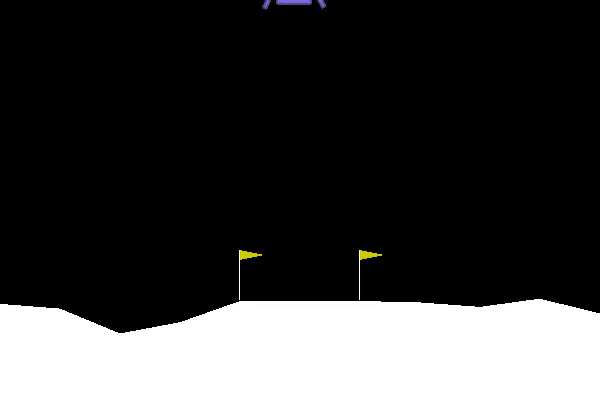

In [9]:
env = gym.make("LunarLander-v2")
env = gym.wrappers.Monitor(env, './videos/' + str(time.time()) + '/', force = True)

deep_agent = DQNAgent(env)
num_episodes = 400
rewards = []
for ep in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    for t in range(10000):
        action = deep_agent.get_action(state)        
        next_state, reward, done, info = env.step(action)
        deep_agent.train(state, action, next_state, reward, done)
        env.render()
        total_reward += reward
        state = next_state
        
        if done:
            print("Episode {} done in {} timesteps! Total reward: {}, eps: {}\n".format(ep+1, t+1, total_reward, deep_agent.eps))
            break
    else:
        print("Episode {} NOT done in limit of {} timesteps! Agent Terminated!\n".format(ep+1, t+1))
            
    rewards.append(total_reward)    
    
env.close()

||Action-Space|| = 4
||State-Space|| range: [-inf -inf -inf -inf -inf -inf -inf -inf] [inf inf inf inf inf inf inf inf]
Episode 1 done in 102 timesteps! Total reward: -268.5321071566775, eps: 0.99

Episode 2 done in 86 timesteps! Total reward: -71.1623971866663, eps: 0.9801

Episode 3 done in 93 timesteps! Total reward: -215.4904849772297, eps: 0.9702989999999999

Episode 4 done in 112 timesteps! Total reward: -208.7737803343297, eps: 0.96059601

Episode 5 done in 124 timesteps! Total reward: -163.86416133577302, eps: 0.9509900498999999

Episode 6 done in 92 timesteps! Total reward: -91.84607389968366, eps: 0.9414801494009999

Episode 7 done in 95 timesteps! Total reward: -122.85238055007942, eps: 0.9320653479069899

Episode 8 done in 101 timesteps! Total reward: -58.112307223011186, eps: 0.92274469442792

Episode 9 done in 105 timesteps! Total reward: -258.05426489620163, eps: 0.9135172474836407

Episode 10 done in 133 timesteps! Total reward: -81.66288800679324, eps: 0.90438207500880

Episode 89 done in 1000 timesteps! Total reward: -54.18866328670329, eps: 0.40882017442254937

Episode 90 done in 206 timesteps! Total reward: -7.490553116978219, eps: 0.4047319726783239

Episode 91 done in 1000 timesteps! Total reward: 29.85019243123108, eps: 0.40068465295154065

Episode 92 done in 299 timesteps! Total reward: -241.55608076914368, eps: 0.39667780642202527

Episode 93 done in 1000 timesteps! Total reward: 61.04630339356158, eps: 0.392711028357805

Episode 94 done in 239 timesteps! Total reward: -161.63372335150297, eps: 0.38878391807422696

Episode 95 done in 127 timesteps! Total reward: -119.88206205720867, eps: 0.3848960788934847

Episode 96 done in 121 timesteps! Total reward: 13.298356831113935, eps: 0.38104711810454983

Episode 97 done in 95 timesteps! Total reward: -6.692423930849486, eps: 0.37723664692350434

Episode 98 done in 249 timesteps! Total reward: -159.54708086118399, eps: 0.37346428045426927

Episode 99 done in 148 timesteps! Total reward: 13.339258042

Episode 176 done in 549 timesteps! Total reward: -243.87525645202044, eps: 0.1705274308895864

Episode 177 done in 1000 timesteps! Total reward: 114.50455869248395, eps: 0.16882215658069055

Episode 178 done in 228 timesteps! Total reward: 30.806512880990283, eps: 0.16713393501488363

Episode 179 done in 1000 timesteps! Total reward: 74.6929245483934, eps: 0.16546259566473479

Episode 180 done in 532 timesteps! Total reward: 252.19456302222753, eps: 0.16380796970808745

Episode 181 done in 1000 timesteps! Total reward: 41.001483676177614, eps: 0.16216989001100657

Episode 182 done in 1000 timesteps! Total reward: 154.2211991333922, eps: 0.1605481911108965

Episode 183 done in 481 timesteps! Total reward: -110.68575176411072, eps: 0.15894270919978754

Episode 184 done in 1000 timesteps! Total reward: 13.425044605789644, eps: 0.15735328210778965

Episode 185 done in 248 timesteps! Total reward: -171.4264734460047, eps: 0.15577974928671176

Episode 186 done in 1000 timesteps! Total reward

Episode 269 done in 250 timesteps! Total reward: 31.370780596820453, eps: 0.1

Episode 270 done in 299 timesteps! Total reward: 243.3753301761076, eps: 0.1

Episode 271 done in 1000 timesteps! Total reward: -21.686162796770045, eps: 0.1

Episode 272 done in 274 timesteps! Total reward: 242.39975572102315, eps: 0.1

Episode 273 done in 670 timesteps! Total reward: 129.44700122092803, eps: 0.1

Episode 274 done in 377 timesteps! Total reward: 168.82807097595932, eps: 0.1

Episode 275 done in 536 timesteps! Total reward: 207.91261688084484, eps: 0.1

Episode 276 done in 480 timesteps! Total reward: 218.99827928218477, eps: 0.1

Episode 277 done in 1000 timesteps! Total reward: 176.6469097479521, eps: 0.1

Episode 278 done in 1000 timesteps! Total reward: 14.1822331906495, eps: 0.1

Episode 279 done in 616 timesteps! Total reward: 202.22532885514872, eps: 0.1

Episode 280 done in 775 timesteps! Total reward: 113.0114081655388, eps: 0.1

Episode 281 done in 417 timesteps! Total reward: 232.

Episode 373 done in 426 timesteps! Total reward: 189.9556749769436, eps: 0.1

Episode 374 done in 991 timesteps! Total reward: 145.4911907103623, eps: 0.1

Episode 375 done in 801 timesteps! Total reward: 163.49243334466502, eps: 0.1

Episode 376 done in 600 timesteps! Total reward: 190.00156884937093, eps: 0.1

Episode 377 done in 214 timesteps! Total reward: 306.6413139056768, eps: 0.1

Episode 378 done in 625 timesteps! Total reward: 224.6944888131634, eps: 0.1

Episode 379 done in 715 timesteps! Total reward: 143.20983898739547, eps: 0.1

Episode 380 done in 948 timesteps! Total reward: 97.4625603225255, eps: 0.1

Episode 381 done in 477 timesteps! Total reward: 218.82171105513692, eps: 0.1

Episode 382 done in 100 timesteps! Total reward: -108.09578165978402, eps: 0.1

Episode 383 done in 167 timesteps! Total reward: -50.90756751103228, eps: 0.1

Episode 384 done in 93 timesteps! Total reward: -2.868699630797366, eps: 0.1

Episode 385 done in 503 timesteps! Total reward: 312.32147

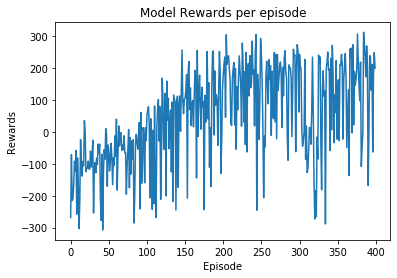

In [10]:
plt.plot(rewards)
plt.title('Model Rewards per episode')
plt.ylabel('Rewards')
plt.xlabel('Episode')
plt.show()

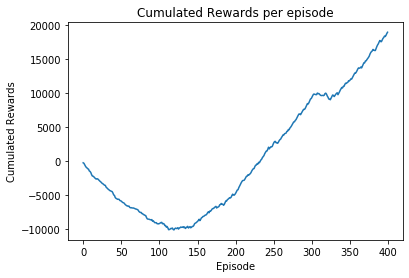

In [14]:
ravg=[]
rtot=[]
rtotal=0
for i,r in enumerate(rewards):
    rtotal+=r
    rtot.append(rtotal)
    ravg.append(rtotal/(i+1))

plt.plot(rtot)
plt.title('Cumulated Rewards per episode')
plt.ylabel('Cumulated Rewards')
plt.xlabel('Episode')
plt.show()  
 

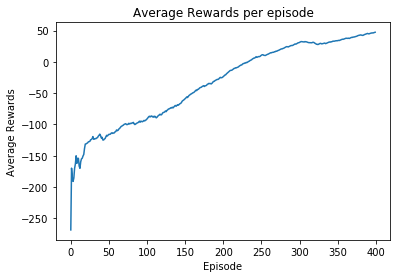

In [15]:
plt.plot(ravg)
plt.title('Average Rewards per episode')
plt.ylabel('Average Rewards')
plt.xlabel('Episode')
plt.show()   

In [16]:
deep_agent.qnn.save("qnn_160-120_400ep.h5")